<a href="https://colab.research.google.com/github/AlexeyMakovskiy/diplomHSE/blob/main/diplom_HSE(fr_2006).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

датасет  Genius Song Lyrics

Часть 1 тематическое моделирование

In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/fr_core_news_sm-3.7.0/fr_core_news_sm-3.7.0.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fr-core-news-sm: filename=fr_core_news_sm-3.7.0-py3-none-any.whl size=16263938 sha256=9dc2d9b0a367017257a02496ab5c6cc4bf99461550424a1823916c54741596d8
  Stored in directory: /root/.cache/pip/wheels/5f/22/1e/546518ae166e75ff56a6ec9d8fd40afb02c53ecaf96884f890
Successfully built fr-core-news-sm


In [ ]:
# Тематическое моделирование

import spacy
import pandas as pd
import requests
from nltk.corpus import stopwords
from nltk import download
import gensim
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np


download('stopwords')
df = pd.read_csv('https://raw.githubusercontent.com/AlexeyMakovskiy/diplomHSE/main/df_2000_2005(fr).csv')
df_2 = pd.read_csv('https://raw.githubusercontent.com/AlexeyMakovskiy/diplomHSE/main/df_2006_2009(fr).csv')
df.info()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11375 entries, 0 to 11374
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          11375 non-null  object
 1   tag            11375 non-null  object
 2   artist         11375 non-null  object
 3   year           11375 non-null  int64 
 4   views          11375 non-null  int64 
 5   features       11375 non-null  object
 6   lyrics         11375 non-null  object
 7   id             11375 non-null  int64 
 8   language_cld3  11375 non-null  object
 9   language_ft    11375 non-null  object
 10  language       11375 non-null  object
dtypes: int64(3), object(8)
memory usage: 977.7+ KB


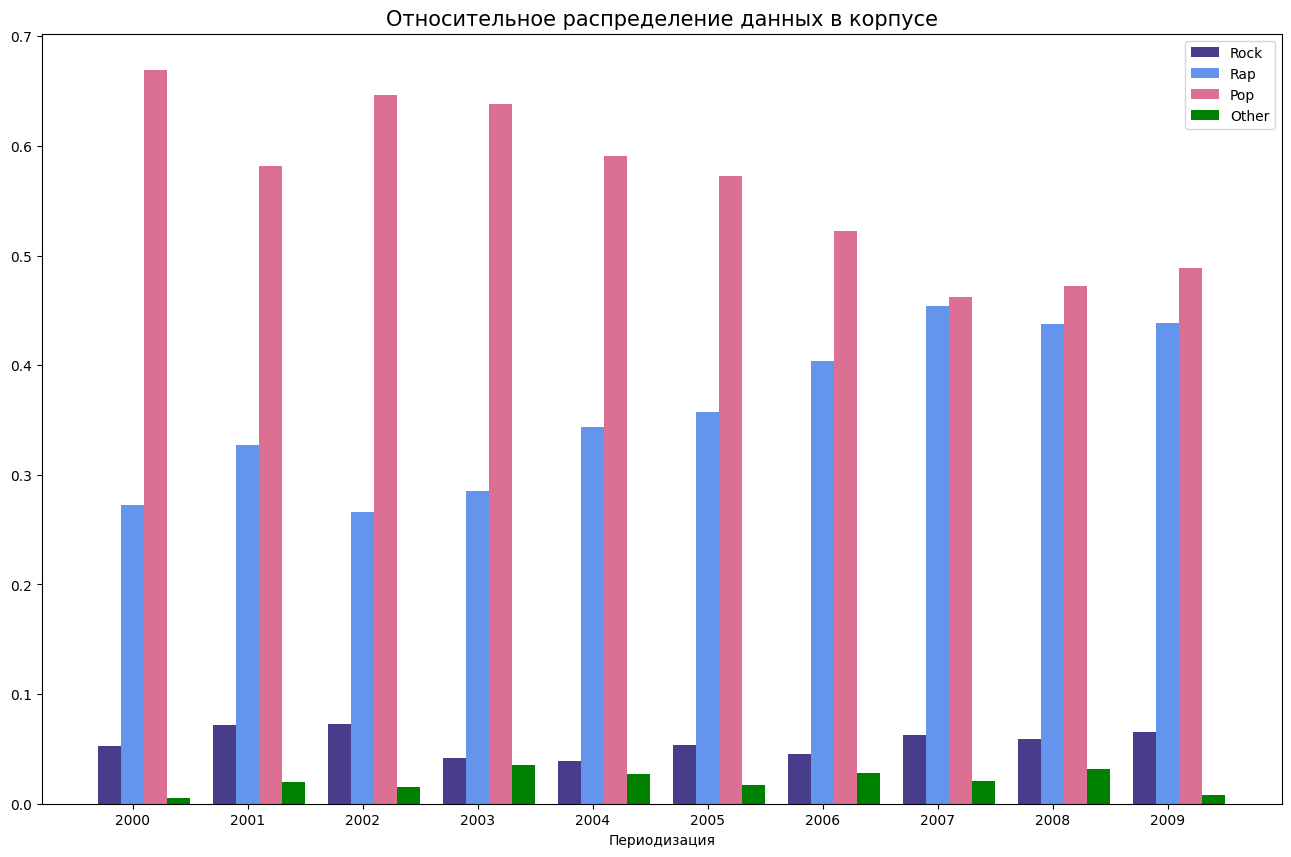

In [ ]:
# Визуальзация структуры корпуса
df_fr_2000 = df[(df['year']== 2000)].sort_values(by=['tag'])
df_fr_2001 = df[(df['year']== 2001)].sort_values(by=['tag'])
df_fr_2002 = df[(df['year']== 2002)].sort_values(by=['tag'])
df_fr_2003 = df[(df['year']== 2003)].sort_values(by=['tag'])
df_fr_2004 = df[(df['year']== 2004)].sort_values(by=['tag'])
df_fr_2005 = df[(df['year']== 2005)].sort_values(by=['tag'])
df_fr_2006 = df_2[(df_2['year']== 2006)].sort_values(by=['tag'])
df_fr_2007 = df_2[(df_2['year']== 2007)].sort_values(by=['tag'])
df_fr_2008 = df_2[(df_2['year']== 2008)].sort_values(by=['tag'])
df_fr_2009 = df_2[(df_2['year']== 2009)].sort_values(by=['tag'])
#df_fr_2010 = df_2[(df_2['year']== 2010)].sort_values(by=['tag'])

colors = ['darkslateblue', 'cornflowerblue', 'palevioletred', 'green']
period = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']


rock = [len(df_fr_2000[(df_fr_2000['tag'] == 'rock')])/len(df_fr_2000),
        len(df_fr_2001[(df_fr_2001['tag'] == 'rock')])/len(df_fr_2001),
        len(df_fr_2002[(df_fr_2002['tag'] == 'rock')])/len(df_fr_2002),
        len(df_fr_2003[(df_fr_2003['tag'] == 'rock')])/len(df_fr_2003),
        len(df_fr_2004[(df_fr_2004['tag'] == 'rock')])/len(df_fr_2004),
        len(df_fr_2005[(df_fr_2005['tag'] == 'rock')])/len(df_fr_2005),
        len(df_fr_2006[(df_fr_2006['tag'] == 'rock')])/len(df_fr_2006),
        len(df_fr_2007[(df_fr_2007['tag'] == 'rock')])/len(df_fr_2007),
        len(df_fr_2008[(df_fr_2008['tag'] == 'rock')])/len(df_fr_2008),
        len(df_fr_2009[(df_fr_2009['tag'] == 'rock')])/len(df_fr_2009)]
#        len(df_fr_2010[(df_fr_2010['tag'] == 'rock')])/len(df_fr_2010)]

rap = [len(df_fr_2000[(df_fr_2000['tag'] == 'rap')])/len(df_fr_2000),
       len(df_fr_2001[(df_fr_2001['tag'] == 'rap')])/len(df_fr_2001),
       len(df_fr_2002[(df_fr_2002['tag'] == 'rap')])/len(df_fr_2002),
       len(df_fr_2003[(df_fr_2003['tag'] == 'rap')])/len(df_fr_2003),
       len(df_fr_2004[(df_fr_2004['tag'] == 'rap')])/len(df_fr_2004),
       len(df_fr_2005[(df_fr_2005['tag'] == 'rap')])/len(df_fr_2005),
       len(df_fr_2006[(df_fr_2006['tag'] == 'rap')])/len(df_fr_2006),
       len(df_fr_2007[(df_fr_2007['tag'] == 'rap')])/len(df_fr_2007),
       len(df_fr_2008[(df_fr_2008['tag'] == 'rap')])/len(df_fr_2008),
       len(df_fr_2009[(df_fr_2009['tag'] == 'rap')])/len(df_fr_2009)]
 #      len(df_fr_2010[(df_fr_2010['tag'] == 'rap')])/len(df_fr_2010)]

pop = [len(df_fr_2000[(df_fr_2000['tag'] == 'pop')])/len(df_fr_2000),
       len(df_fr_2001[(df_fr_2001['tag'] == 'pop')])/len(df_fr_2001),
       len(df_fr_2002[(df_fr_2002['tag'] == 'pop')])/len(df_fr_2002),
       len(df_fr_2003[(df_fr_2003['tag'] == 'pop')])/len(df_fr_2003),
       len(df_fr_2004[(df_fr_2004['tag'] == 'pop')])/len(df_fr_2004),
       len(df_fr_2005[(df_fr_2005['tag'] == 'pop')])/len(df_fr_2005),
       len(df_fr_2006[(df_fr_2006['tag'] == 'pop')])/len(df_fr_2006),
       len(df_fr_2007[(df_fr_2007['tag'] == 'pop')])/len(df_fr_2007),
       len(df_fr_2008[(df_fr_2008['tag'] == 'pop')])/len(df_fr_2008),
       len(df_fr_2009[(df_fr_2009['tag'] == 'pop')])/len(df_fr_2009)]
#       len(df_fr_2010[(df_fr_2010['tag'] == 'pop')])/len(df_fr_2010)]

other = [len(df_fr_2000[(df_fr_2000['tag'] != 'rock')&(df_fr_2000['tag'] != 'pop')&(df_fr_2000['tag'] != 'rap')])/len(df_fr_2000),
         len(df_fr_2001[(df_fr_2001['tag'] != 'rock')&(df_fr_2001['tag'] != 'pop')&(df_fr_2001['tag'] != 'rap')])/len(df_fr_2001),
         len(df_fr_2002[(df_fr_2002['tag'] != 'rock')&(df_fr_2002['tag'] != 'pop')&(df_fr_2002['tag'] != 'rap')])/len(df_fr_2002),
         len(df_fr_2003[(df_fr_2003['tag'] != 'rock')&(df_fr_2003['tag'] != 'pop')&(df_fr_2003['tag'] != 'rap')])/len(df_fr_2003),
         len(df_fr_2004[(df_fr_2004['tag'] != 'rock')&(df_fr_2004['tag'] != 'pop')&(df_fr_2004['tag'] != 'rap')])/len(df_fr_2004),
         len(df_fr_2005[(df_fr_2005['tag'] != 'rock')&(df_fr_2005['tag'] != 'pop')&(df_fr_2005['tag'] != 'rap')])/len(df_fr_2005),
         len(df_fr_2006[(df_fr_2006['tag'] != 'rock')&(df_fr_2006['tag'] != 'pop')&(df_fr_2006['tag'] != 'rap')])/len(df_fr_2006),
         len(df_fr_2007[(df_fr_2007['tag'] != 'rock')&(df_fr_2007['tag'] != 'pop')&(df_fr_2007['tag'] != 'rap')])/len(df_fr_2007),
         len(df_fr_2008[(df_fr_2008['tag'] != 'rock')&(df_fr_2008['tag'] != 'pop')&(df_fr_2008['tag'] != 'rap')])/len(df_fr_2008),
         len(df_fr_2009[(df_fr_2009['tag'] != 'rock')&(df_fr_2009['tag'] != 'pop')&(df_fr_2009['tag'] != 'rap')])/len(df_fr_2009)]
 #        len(df_fru_2010[(df_fru_2010['tag'] != 'rock')&(df_fru_2010['tag'] != 'pop')&(df_fru_2010['tag'] != 'rap')])/len(df_fru_2010)]

# Multi bar Chart
plt.figure(figsize=(16,10))

x_axis = np.arange(len(period))
plt.bar(x_axis, rock, color = colors[0], width=0.2, label = 'Rock')
plt.bar(x_axis +0.2, rap, color = colors[1], width=0.2, label = 'Rap')
plt.bar(x_axis +0.2*2, pop, color = colors[2], width=0.2, label = 'Pop')
plt.bar(x_axis +0.2*3, other, color = colors[3], width=0.2, label = 'Other')

plt.xticks(x_axis+0.2, period)

# Add x and ylabels
plt.xlabel('Периодизация')
#plt.ylabel('Количество вхождений в базе данных')
plt.title(label="Относительное распределение данных в корпусе",
          fontsize=15,
          color="black")
plt.legend()
plt.show()



из построенной гистограммы видно, что в отличии от корпуса русских песен, доля песен на французском в жанре ROCK остается относительно постоянной, но начиная с 2003-2004г происходит перераспределение интереса в жанре POP и RAP (справедливости ради французский рок на мой взгляд нечно ужасное может тут можно развить "гипотеза Сепира — Уорфа")

In [ ]:
# Визуальзация структуры корпуса
df_fr_2000 = df[(df['year']== 2006)].sort_values(by=['tag'])

colors = ['darkslateblue', 'cornflowerblue', 'palevioletred', 'green']
period = ['2000']


rock = [len(df_fr_2000[(df_fr_2000['tag'] == 'rock')])/len(df_fr_2000)]
rap = [len(df_fr_2000[(df_fr_2000['tag'] == 'rap')])/len(df_fr_2000)]
pop = [len(df_fr_2000[(df_fr_2000['tag'] == 'pop')])/len(df_fr_2000)]
other = [len(df_fr_2000[(df_fr_2000['tag'] != 'rock')&(df_fr_2000['tag'] != 'pop')&(df_fr_2000['tag'] != 'rap')])/len(df_fr_2000)]

# Multi bar Chart
x_axis = 1
plt.bar(x_axis, rock, color = colors[0], width=0.2, label = 'Rock')
plt.bar(x_axis +0.2, rap, color = colors[1], width=0.2, label = 'Rap')
plt.bar(x_axis +0.2*2, pop, color = colors[2], width=0.2, label = 'Pop')
plt.bar(x_axis +0.2*3, other, color = colors[3], width=0.2, label = 'Other')

# Add x and ylabels
plt.xlabel('Периодизация')
plt.ylabel('Количество вхождений в базе данных')
plt.title(label="Относительное распределение данных в корпусе",
          fontsize=15,
          color="black")
plt.legend()
plt.show()

ZeroDivisionError: division by zero

Часть 1.1 Моделирование общего корпуса

In [ ]:
# Собираем текст из слов

full_texts = []
for index, row in df_2.iterrows():
    if (pd.notnull(row['lyrics'])) and (row['year'] == 2006):
        full_texts.append(row['lyrics'])

In [ ]:
full_texts[1:10]

In [ ]:
punctuation = '!\"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~—»«...–'
filter = stopwords.words('french') + list(punctuation) + stopwords.words('english')

In [ ]:
# Функция для предобработки, которая токенизирует, лемматизирует и делает все буквы строчными

def preprocess(input_text):
    nlp = spacy.load("fr_core_news_sm")
    tokenized_text = nlp(input_text)
    lowercase_text = [token.text.lower() for token in tokenized_text]
    ## убираем пунктуацию и стоп-слова:
    output_text = [token for token in lowercase_text if token not in filter]
    clean_text = [word for word in output_text if word.isalpha()]
    return clean_text

In [ ]:
preprocessed_texts = []
for text in tqdm(full_texts):
    if isinstance(text, str):
        preprocessed_text = preprocess(text)
        preprocessed_texts.append(preprocessed_text)
    else:
        continue

100%|██████████| 2835/2835 [1:47:20<00:00,  2.27s/it]


In [ ]:
# Save preprocessed texts to a file on Google Drive
from google.colab import drive
drive.mount('drive')
with open('drive/My Drive/HSE_diploma/fr_file_2000.txt', 'w') as output:
    output.write(str(preprocessed_texts))

Mounted at drive


Тематическое моделирование (анализ частотностей TF-IDF)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import string
import glob
import re

In [ ]:
# Функция для предобработки, которая делает все буквы строчными и удаляет стопслова
def prep_tfidf(input_text):
    words = input_text.split()
    final = []
    for word in words:
        word = word.lower()
        if word not in filter:
            final.append(word)
    final = " ".join(final)
    final = "".join([i for i in final if not i.isdigit()])
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)


In [ ]:
cleaned_docs = []
for text in (full_texts):
    if isinstance(text, str):
        preprocessed_text = prep_tfidf(text)
        cleaned_docs.append(preprocessed_text)
    else:
        continue

cleaned_docs[1]

"trois années jungle ligotée, baillonnée entourée dingues doux illuminés t'ont fait prisonnière otage précisément triste guerre perdue depuis longtemps voulaient jadis liberté, droit crachent justice s'en prenant méprisent vie femme bout leurs fusils victoire fanée t'attendons ingrid pensons libres lorsque trois années jungle ligotée, baillonnée porte-flingues devenus geôliers citent staline lisent mao qui, j'imagine préfèrerait rimbaud peut-être, comme croyais-tu, naguère fils che guevara porteurs lumière lutte finale matin grand soir c'est haine mal surtout dollars t'attendons ingrid pensons libres lorsque n'connais nom tous ceux, comme croupissent prison otages ici là anonymes, oubliés victimes conflits où, chaque côté sévit barbarie narco-trafiquants d'un pouvoir corrompu d'un indigne président payez tribut 'lors chantant ingrid, veux aussi rappeler combats contre double ennemi t'attendons ingrid pensons libres lorsque trois années jungle ligotée, baillonnée vent cingle cheveux déf

In [ ]:
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8,
                                min_df=5,
                                ngram_range = (2,3),
                                stop_words = filter
                      )

vectors = vectorizer.fit_transform(cleaned_docs)

feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()

In [ ]:
all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)
#print (full_texts[0])
#print (all_keywords[0])

In [ ]:
true_k = 10

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

In [ ]:
#разделение на кластеры
with open ("/trc_results.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i, :10]:
            f.write (' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")



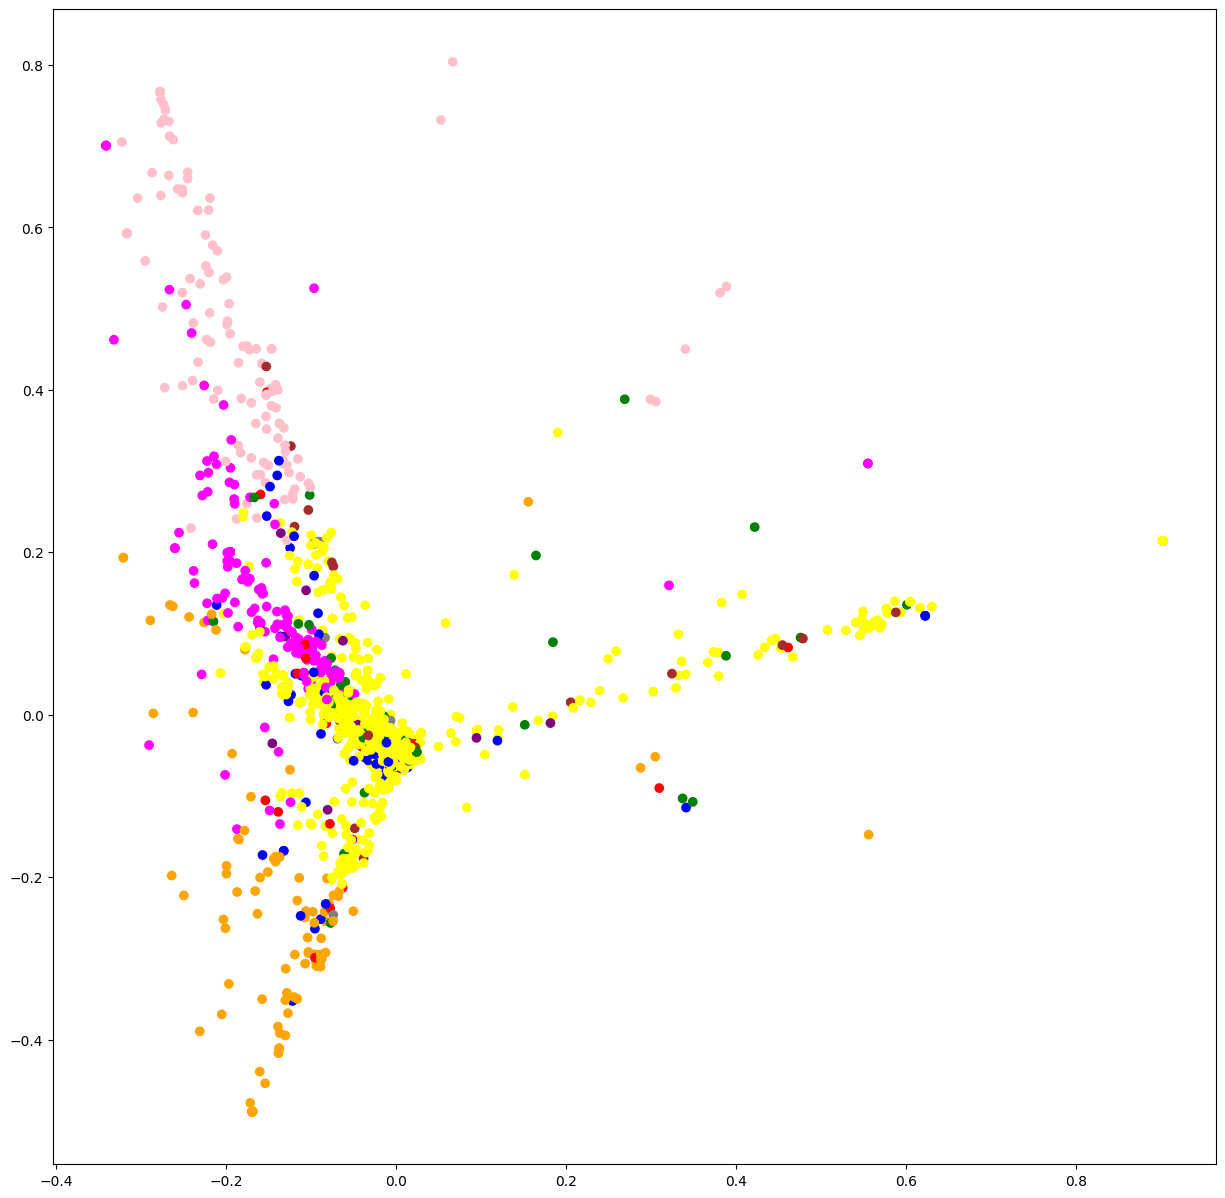

<Figure size 640x480 with 0 Axes>

In [ ]:
#Визуализация
kmeans_indices = model.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = {
    0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'magenta',
    5: 'pink', 6: 'grey', 7: 'yellow', 8: 'brown', 9: 'purple'
}

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmeans_indices])



plt.show()
plt.savefig('trc.png')


In [ ]:
# Создаем словарь из получившихся токенов

gensim_dictionary_for_TM = gensim.corpora.Dictionary(preprocessed_texts)
gensim_dictionary_for_TM.filter_extremes(no_above=0.1 , no_below=20)
#gensim_dictionary_for_TM.compactify()
print(gensim_dictionary_for_TM)

Dictionary<2928 unique tokens: ['adore', 'enfants', 'fille', 'jeune', 'voudrais']...>


In [ ]:
corpus = [gensim_dictionary_for_TM.doc2bow(text) for text in preprocessed_texts]

In [ ]:
# раскладываем по "мешкам"

lda = gensim.models.LdaMulticore(corpus,
                                 num_topics = 10, # число топиков
                                 id2word=gensim_dictionary_for_TM,
                                 passes=10)

In [ ]:
lda.print_topics()

[(0,
  '0.014*"musique" + 0.013*"gueule" + 0.009*"elles" + 0.006*"veulent" + 0.005*"fuck" + 0.005*"fort" + 0.005*"baby" + 0.005*"joue" + 0.004*"lève" + 0.004*"autant"'),
 (1,
  '0.012*"pis" + 0.009*"yeah" + 0.007*"femme" + 0.007*"beau" + 0.007*"merci" + 0.007*"secret" + 0.006*"boîte" + 0.005*"paris" + 0.005*"mets" + 0.005*"soleil"'),
 (2,
  '0.012*"aller" + 0.009*"nom" + 0.008*"perdre" + 0.007*"ego" + 0.007*"haut" + 0.007*"trip" + 0.007*"manque" + 0.006*"pars" + 0.006*"jours" + 0.005*"roi"'),
 (3,
  '0.016*"xxx" + 0.007*"gueule" + 0.006*"flow" + 0.005*"nique" + 0.005*"eh" + 0.005*"mic" + 0.005*"man" + 0.004*"casse" + 0.004*"style" + 0.004*"feu"'),
 (4,
  '0.034*"hey" + 0.016*"b" + 0.012*"cours" + 0.012*"yeah" + 0.010*"ha" + 0.009*"chaud" + 0.009*"ordre" + 0.008*"go" + 0.006*"celui" + 0.006*"cuizinier"'),
 (5,
  '0.008*"frères" + 0.007*"ghetto" + 0.007*"ok" + 0.007*"frère" + 0.005*"hein" + 0.005*"demande" + 0.005*"mecs" + 0.005*"veulent" + 0.004*"connais" + 0.004*"négro"'),
 (6,
  '0.00

Визуализация LDA

In [ ]:
# Визуализация с помощью pyLDAvis
!pip install pyldavis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.2 MB/s eta 0:00:00


In [ ]:
vis = gensimvis.prepare(lda, corpus, gensim_dictionary_for_TM)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.146551 -0.060598       1        1  15.827747
3      0.151202 -0.035651       2        1  14.364307
9     -0.086053 -0.016844       3        1  13.569230
6      0.039062 -0.058413       4        1  11.298907
7     -0.071540 -0.006147       5        1  10.874450
1     -0.105045  0.049101       6        1   8.391270
8     -0.059026 -0.035270       7        1   8.237847
0      0.021612 -0.026327       8        1   6.697732
2     -0.101438 -0.036184       9        1   6.218225
4      0.064675  0.226334      10        1   4.520285, topic_info=         Term        Freq       Total Category  logprob  loglift
291       hey  433.000000  433.000000  Default  30.0000  30.0000
372       xxx  645.000000  645.000000  Default  29.0000  29.0000
86       yeah  544.000000  544.000000  Default  28.0000  28.0000
492    gueule  577.000000  577.000000  Default  27.0000  27.0000
1501        b  198.000000  198.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1844    appel   45.884984  126.271340  Topic10  -5.4722   2.0843
239     celui   67.866259  337.407513  Topic10  -5.0808   1.4928
1715  dernier   46.085278  209.877498  Topic10  -5.4679   1.5806
288     coeur   41.395377  456.463779  Topic10  -5.5752   0.6963
387      vaut   38.945396  180.359565  Topic10  -5.6362   1.5638

[625 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2002      5  0.836193  absence
2002      6  0.139365  absence
2002      8  0.015485  absence
2539      1  0.156665     afin
2539      2  0.056969     afin
...     ...       ...      ...
1498      7  0.060368  étouffe
1793      3  0.075640        ô
1793      4  0.030256        ô
1793      7  0.030256        ô
1793      8  0.847168        ô

[3529 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 10, 7, 8, 2, 9, 1, 3, 5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


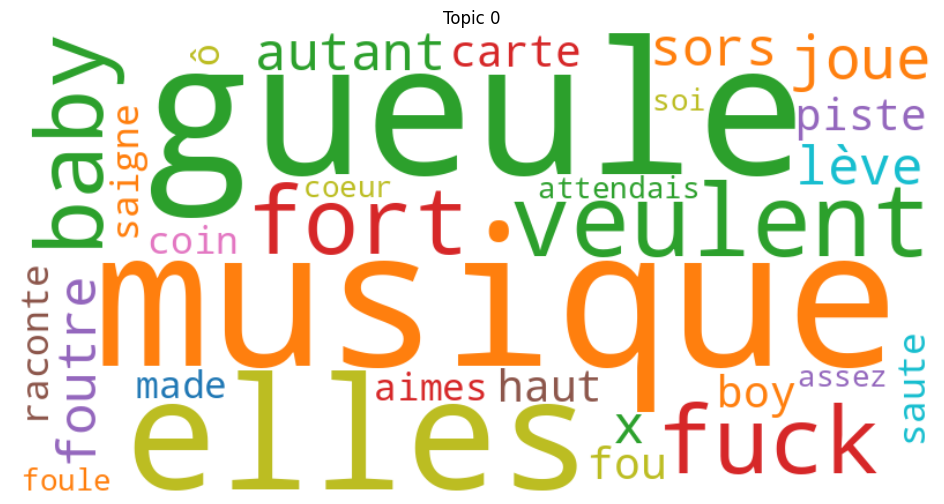

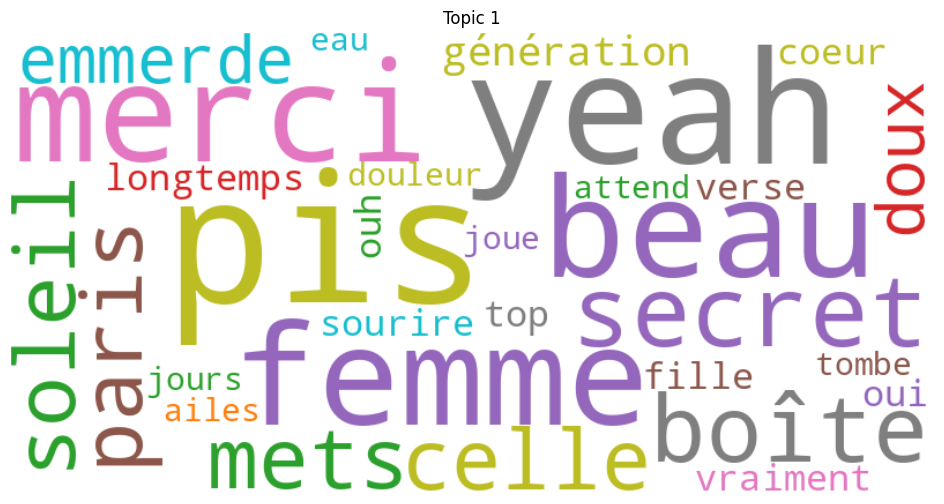

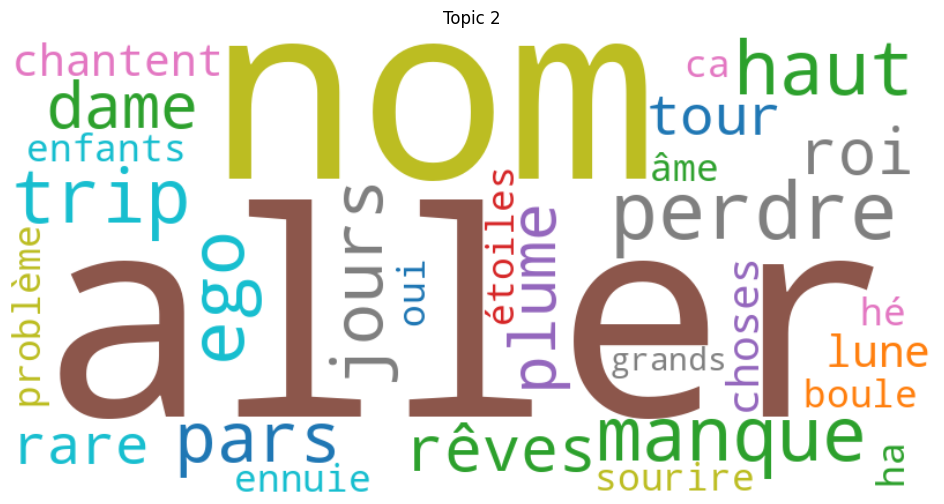

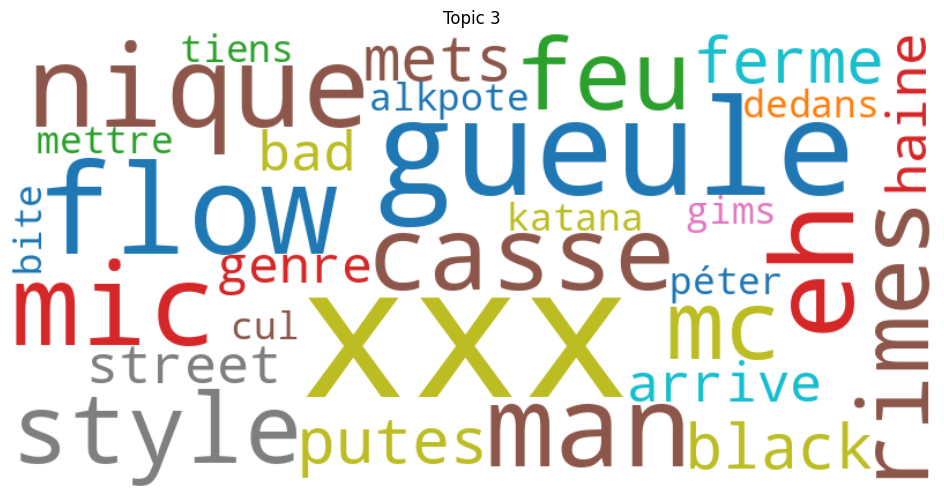

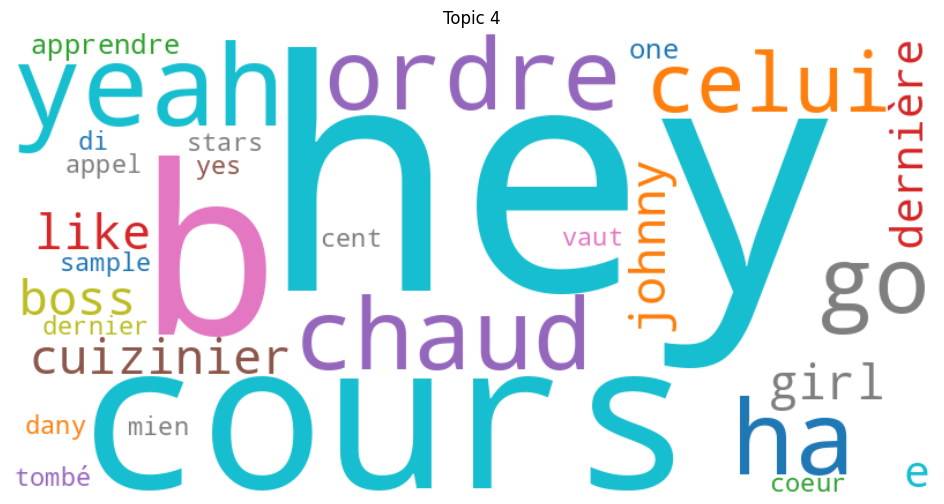

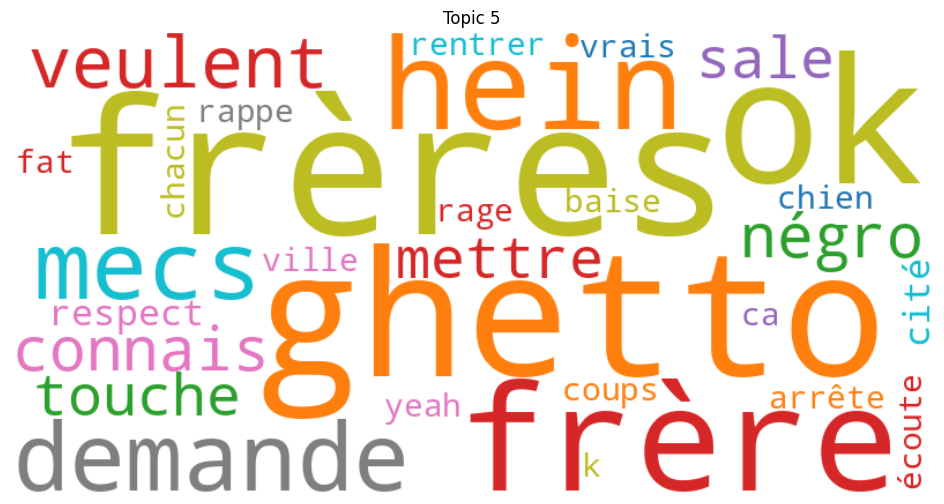

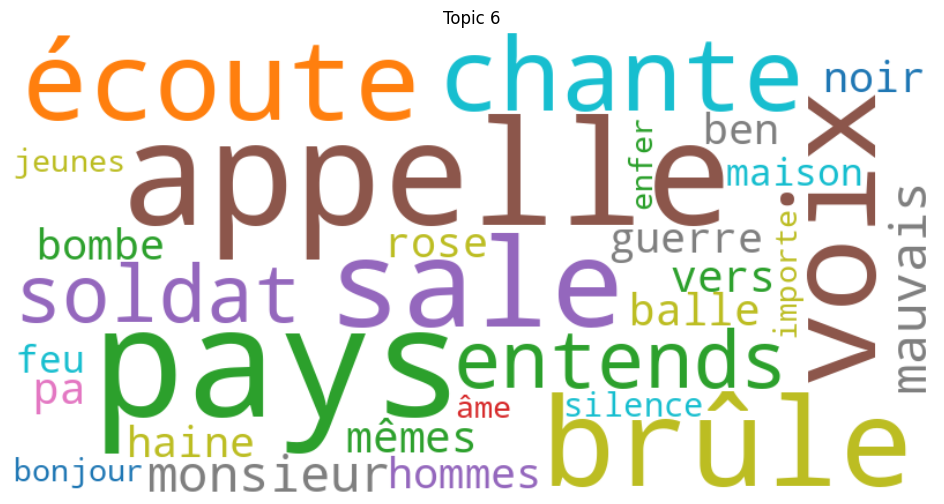

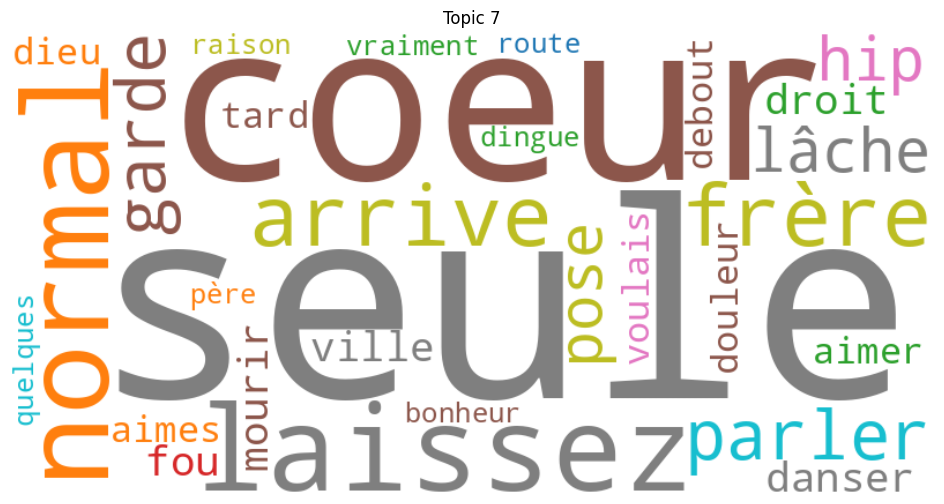

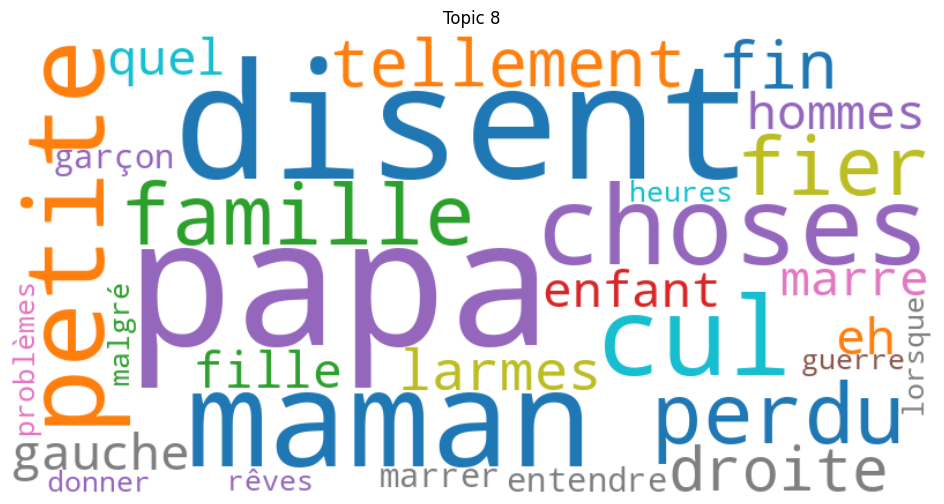

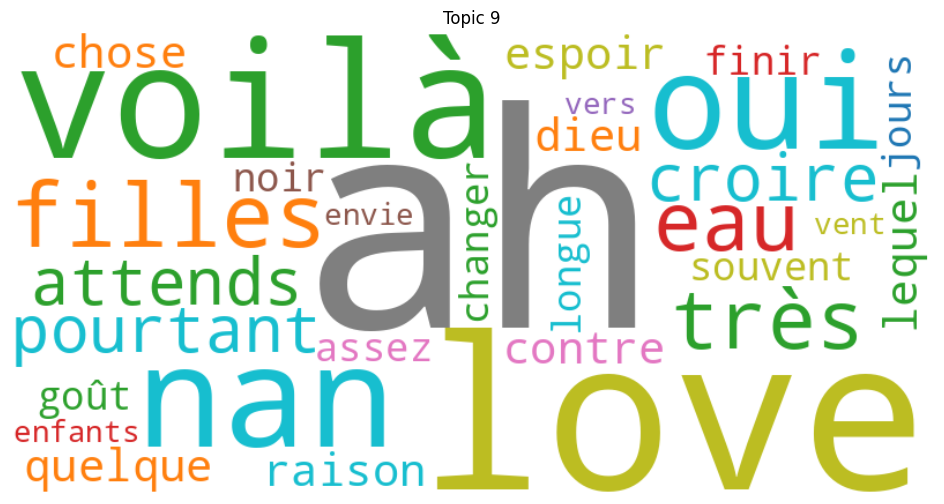

In [ ]:
# Визуализироем с помощью вордклауд

num_topics = 10

for topic in lda.show_topics(num_topics=num_topics, num_words=30, formatted=False):
    topic_num = topic[0]
    words = dict(topic[1])
    weights = {word: round(weight * 1000) for word, weight in words.items()}

    wordcloud = WordCloud(background_color="white", width=800, height=400, colormap="tab10").generate_from_frequencies(weights)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_num}")
    plt.show()